<a href="https://colab.research.google.com/github/pierrot73/GenAIBootCamp/blob/main/w5_d1_07_07_Dailly_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow numpy scikit-learn matplotlib seaborn

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
np.random.seed(42)
tf.random.set_seed(42)


In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [7]:
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

In [9]:
num_classes = 10
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes)

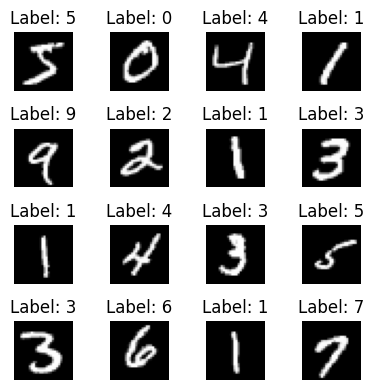

In [30]:
plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
ffn = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
       ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
ffn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5315 - loss: 1.4190 - val_accuracy: 0.8588 - val_loss: 0.4909
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8366 - loss: 0.5352 - val_accuracy: 0.9020 - val_loss: 0.3478
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8816 - loss: 0.4044 - val_accuracy: 0.9198 - val_loss: 0.2857
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8993 - loss: 0.3432 - val_accuracy: 0.9288 - val_loss: 0.2507
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9108 - loss: 0.3039 - val_accuracy: 0.9330 - val_loss: 0.2239
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9196 - loss: 0.2735 - val_accuracy: 0.9393 - val_loss: 0.2031
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9270 - loss: 0.2480 - val_accuracy: 0.9443 - val_loss: 0.1852
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9331 - loss: 0.2247

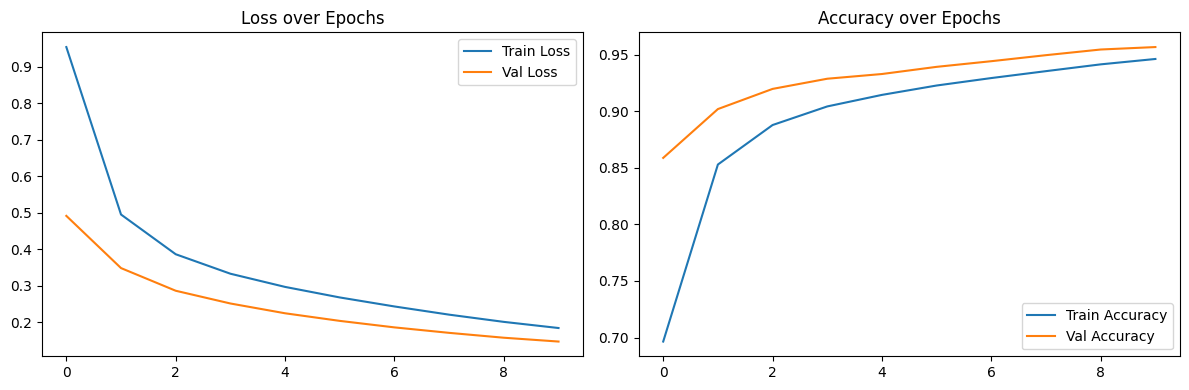

In [36]:
#Entraînement du Modèle

history = ffn.fit(
    X_train, y_train_ohe,
    epochs=10,
    validation_split=0.1,
    batch_size=32
)

# Affichage des courbes de performance
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 28.6359
Test Accuracy: 0.9231
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


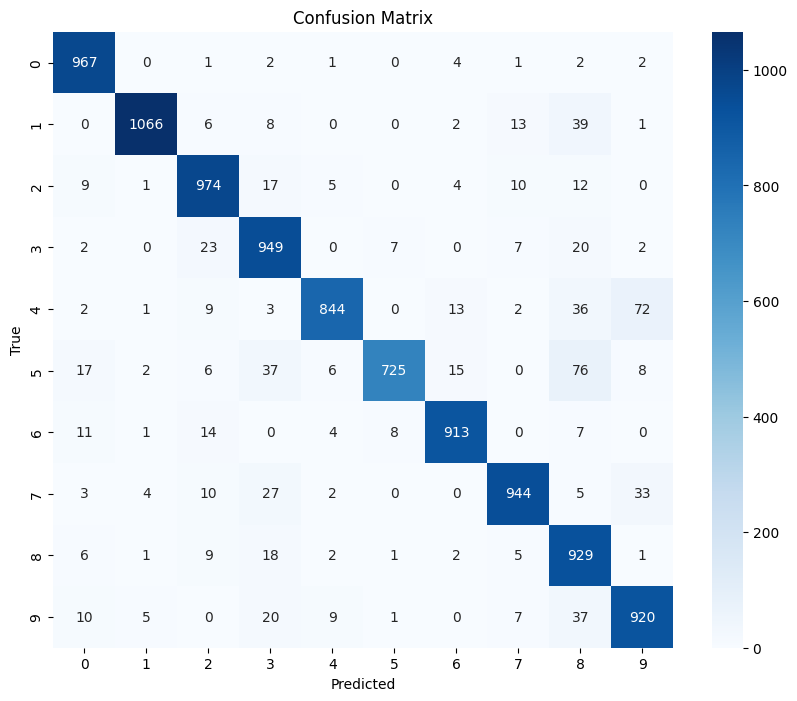

Nombre d'images mal classées : 769


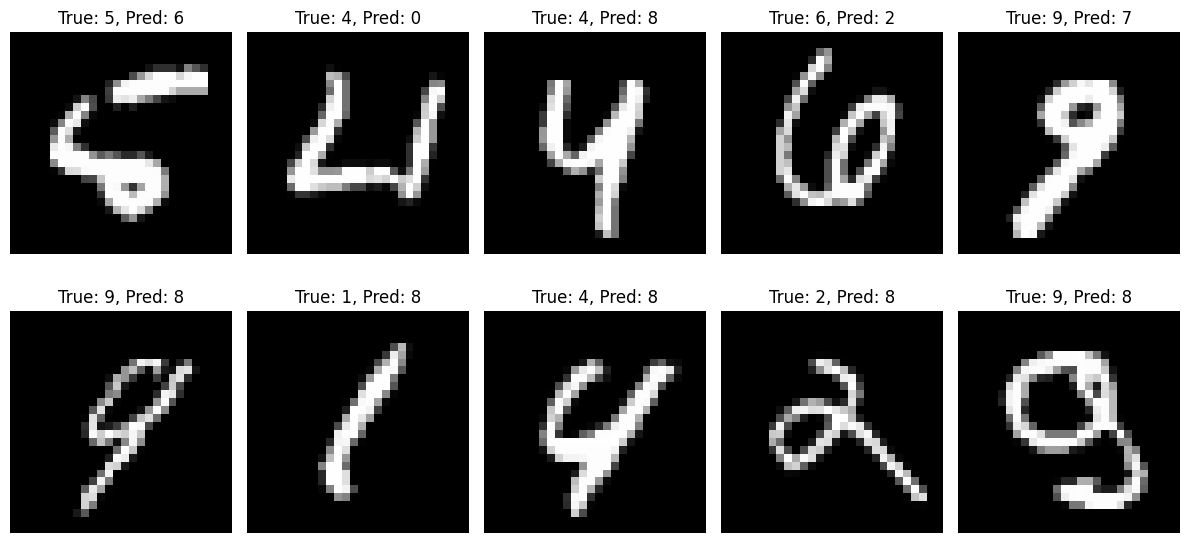

In [38]:
#Évaluation du Modèle
# Évaluation sur le test set
test_loss, test_acc = ffn.evaluate(X_test, y_test_ohe)
print(f"Test Accuracy: {test_acc:.4f}")

# Prédictions
y_pred_probs = ffn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Digits les plus mal classés
misclassified = np.where(y_pred != y_test)[0]
print(f"Nombre d'images mal classées : {len(misclassified)}")

# Afficher quelques exemples de mauvaise classification
plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()